
# <center>Análisis Chat de Whatsapp</center>


<center><img src="https://cdn6.aptoide.com/imgs/c/7/6/c7644008f58970f3d495d2d68958652a_fgraphic.png" width="60%"></center>


In [1]:
pip install whatstk

Note: you may need to restart the kernel to use updated packages.


In [2]:
from whatstk import df_from_whatsapp
df = df_from_whatsapp("_chatTH3.txt")

## Obtenemos el DataFrame

In [4]:
df

,date,username,message
0,2014-10-16 19:25:14,TH3 enterprises,Creaste este grupo.
1,2015-05-30 10:53:53,Negro,imagen omitida
2,2015-05-30 10:53:53,Negro,imagen omitida
3,2015-05-30 10:53:53,Negro,imagen omitida
4,2015-05-30 10:53:54,Negro,imagen omitida
...,...,...,...
77684,2025-02-08 17:33:08,Pche 2.0,imagen omitida
77685,2025-02-08 17:33:52,erickloolpez,imagen omitida
77686,2025-02-08 17:34:07,erickloolpez,imagen omitida
77687,2025-02-13 16:27:01,JOVEN,https://safu.im/8UYtZP39?utm_medium=app_share_...


## Numero de Mensajes

In [5]:
df['username'].value_counts()

username
erickloolpez       31493
Pche 2.0           14163
Negro               8331
Jhosue              8056
Mister Gringo       5834
JOVEN               5058
Poche               4695
Andrieta Erazo        31
Tammy                 18
TH3 enterprises       10
Name: count, dtype: Int64

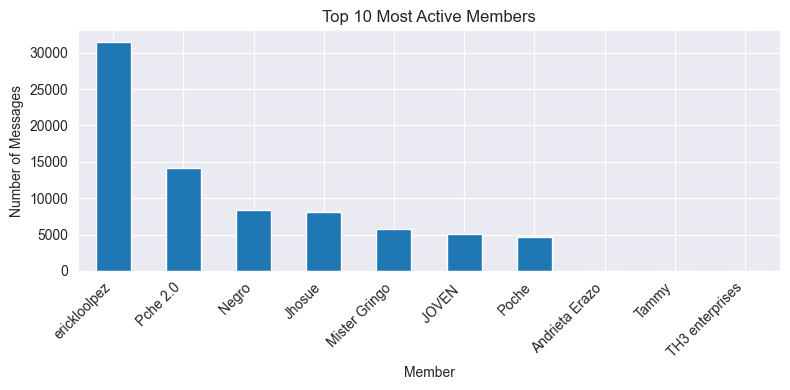

In [7]:
import matplotlib.pyplot as plt
# Message Count by Member
member_counts = df['username'].value_counts()

plt.figure(figsize=(8, 4))
member_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Active Members')
plt.xlabel('Member')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Limpieza de los Datos

In [8]:
import re

def clean_text(texto):
    texto = re.sub(r'^RT[\s]+','', texto)
    texto = re.sub(r'https?:\/\/.*[\r\n*]','', texto)
    texto = re.sub(r'#','', texto)
    texto = re.sub(r'@[A-Za-z0-9_]+', '', texto)
    texto = re.sub(r'http\S+|www.\S+|pic.\S+|\S+.com\S*|\S+.org\S*|\S+.net\S*', '', texto)
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = re.sub(r'^\d+$', '', texto)
    texto = texto.lower().strip()
    return texto

In [9]:

df['clean_message'] = df['message'].apply(clean_text)


## Frecuencia de Palabras

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargar recursos necesarios de NLTK
nltk.download('punkt')       # Para tokenización
nltk.download('stopwords')   # Para stopwords en español

# Definir stopwords en español
stopwords_es = set(stopwords.words('spanish'))

# Agregar más stopwords si es necesario
stopwords_es.update(["de", "la", "el", "en", "y", "que", "a", "los", "las", "un", "una", "con", "del", "se", "por", "para", "es", "al",
                     "lo", "su","jajaja","jaja","jajajaja","jajaj","t","q","si","solo","jajajaj","jajajja","jajajajaja","jajja","jajajajaj",
                     "jajjaja","jajajajja","ahi","ai","maniana","omitido","omitida","imagen","audio","sticker","mas"])

text = " ".join(df['clean_message'].astype(str))  # Une todos los textos en una sola cadena

# Tokenizar el texto
words = word_tokenize(text.lower())  # Convertir a minúsculas y tokenizar

# Filtrar stopwords y palabras no alfabéticas
words_filtered = [word for word in words if word.isalpha() and word not in stopwords_es]

# Contar la frecuencia de las palabras
word_freq = Counter(words_filtered)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Generar la nube de palabras
word_cloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords_es,
    random_state=42,
    collocations=False
).generate(" ".join(words_filtered))


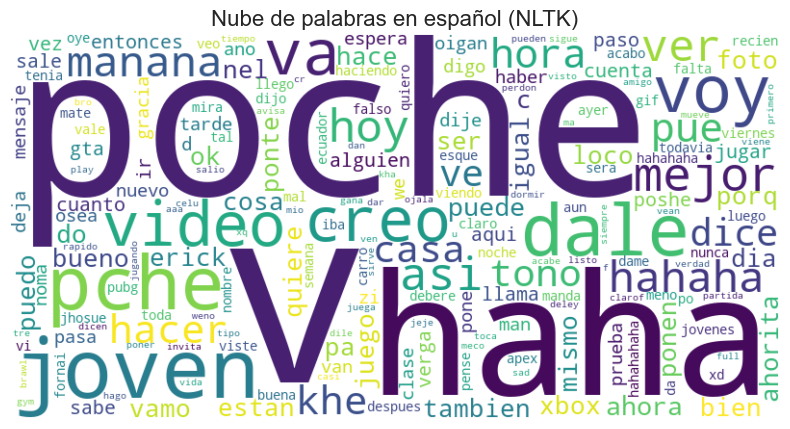

In [12]:
# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')  # Oculta los ejes
plt.title("Nube de palabras en español (NLTK)", fontsize=16)
plt.show()


## Top Palabras mas Frecuentes

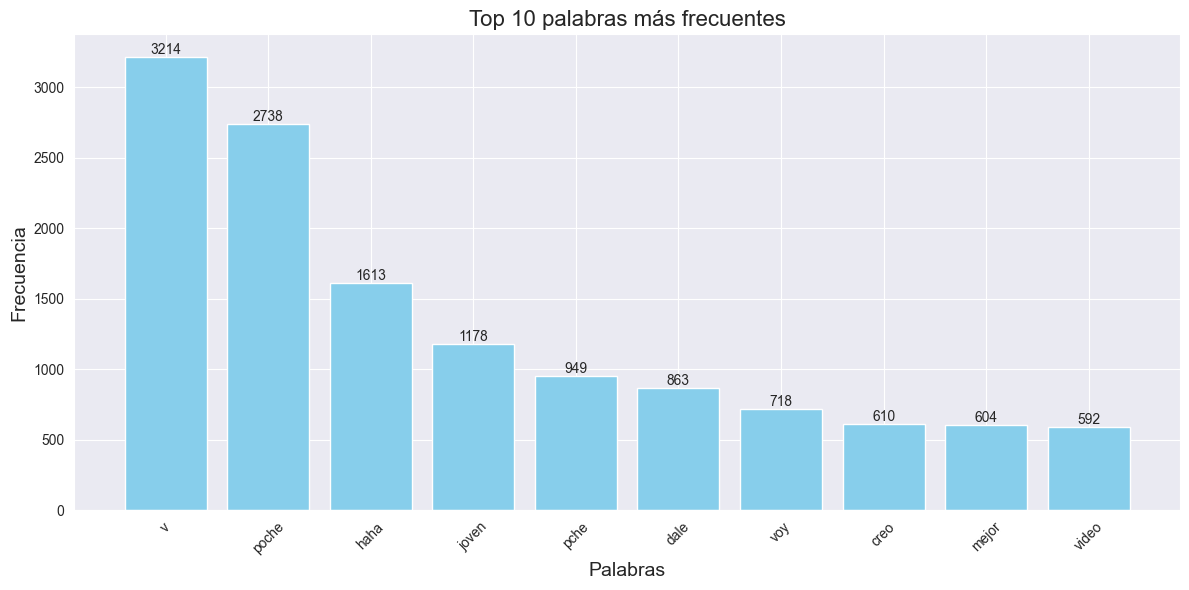

In [13]:
# Crear un gráfico de barras con las 10 palabras más frecuentes
top_10_words = word_freq.most_common(10)
words, frequencies = zip(*top_10_words)

plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Top 10 palabras más frecuentes', fontsize=16)
plt.xlabel('Palabras', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45)

# Añadir etiquetas de frecuencia encima de cada barra
for i, v in enumerate(frequencies):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
df_frequency = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

In [15]:
df_frequency

,Word,Frequency
0,creaste,6
1,grupo,69
2,chiiiii,6
3,buuuuuu,2
4,voy,718
...,...,...
18011,registrar,1
18012,universitarios,1
18013,hawk,1
18014,tuah,1


## Horas cuando mas chismeamos

C:\Users\erick\AppData\Local\Temp\ipykernel_14184\4034249974.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




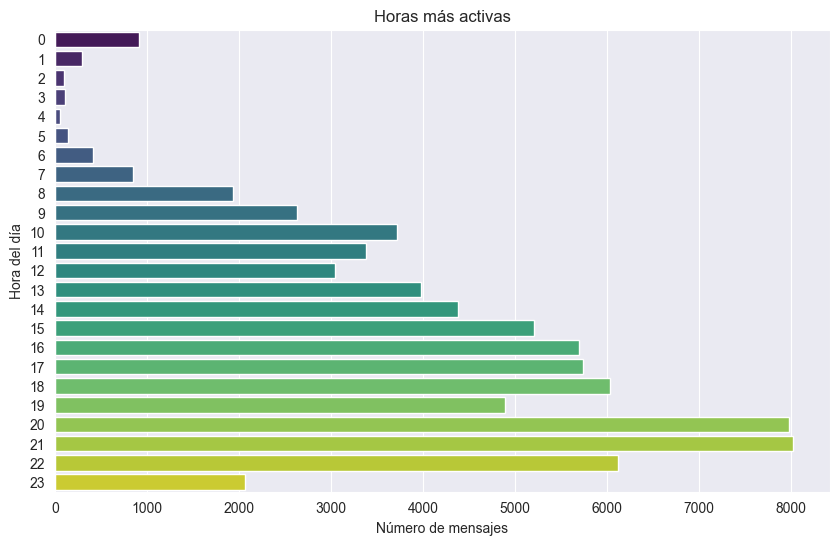

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extraer la hora de la columna 'fecha_hora'
df['hour'] = df['date'].dt.hour

# Contar los mensajes por hora
conteo_por_hora = df.groupby('hour')['clean_message'].count().reset_index()
conteo_por_hora.columns = ['hora', 'conteo_mensajes']

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=conteo_por_hora, x='conteo_mensajes', y='hora', orient='h', palette='viridis')

plt.title('Horas más activas')
plt.xlabel('Número de mensajes')
plt.ylabel('Hora del día')
plt.show()

## Dias en los que mas chismeamos

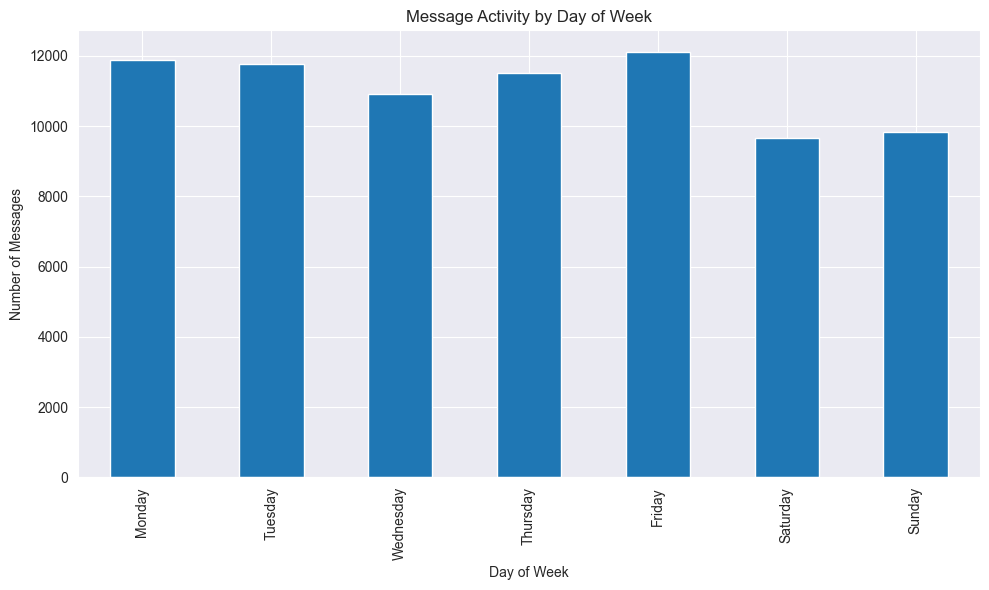

In [17]:
import matplotlib.pyplot as plt
df['day_of_week'] = df['date'].dt.day_name()
day_activity = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
day_activity.plot(kind='bar')
plt.title('Message Activity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Messages')
plt.tight_layout()
plt.show()

In [18]:
day_activity

day_of_week
Monday       11878
Tuesday      11773
Wednesday    10914
Thursday     11504
Friday       12117
Saturday      9673
Sunday        9830
Name: count, dtype: int64

## Actividad a lo largo de los anios

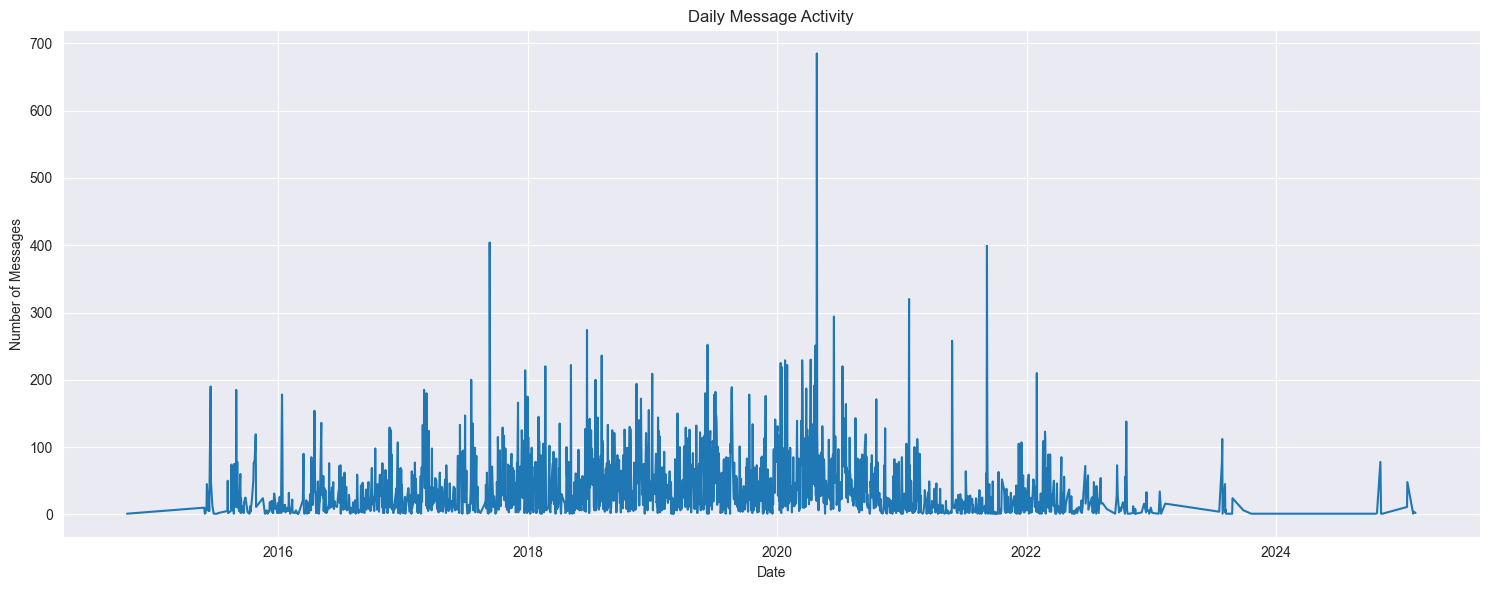

In [19]:
daily_activity = df.groupby(df['date'].dt.date).size()

plt.figure(figsize=(15, 6))
daily_activity.plot()
plt.title('Daily Message Activity')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.tight_layout()
plt.show()